@author: Okky Mabruri

Problem statetment:

* create multiple linear regression analysis of mtcars dataset

* create a model to predict mpg (miles per gallon) using best variable(s) available.

* Explain the diagnostic tests and make a conclusion about the model

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Read Data

Using `get_rdataset` from  statsmodels to **get datasets available in R’s core datasets** package and many other common R packages. 

In [2]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars = pd.DataFrame(mtcars)

|                     |   mpg |   cyl |   disp |   hp |   drat |    wt |   qsec |   vs |   am |   gear |   carb |
|:--------------------|------:|------:|-------:|-----:|-------:|------:|-------:|-----:|-----:|-------:|-------:|
| Mazda RX4           |  21   |     6 |  160   |  110 |   3.9  | 2.62  |  16.46 |    0 |    1 |      4 |      4 |
| Mazda RX4 Wag       |  21   |     6 |  160   |  110 |   3.9  | 2.875 |  17.02 |    0 |    1 |      4 |      4 |
| Datsun 710          |  22.8 |     4 |  108   |   93 |   3.85 | 2.32  |  18.61 |    1 |    1 |      4 |      1 |
| Hornet 4 Drive      |  21.4 |     6 |  258   |  110 |   3.08 | 3.215 |  19.44 |    1 |    0 |      3 |      1 |
| Hornet Sportabout   |  18.7 |     8 |  360   |  175 |   3.15 | 3.44  |  17.02 |    0 |    0 |      3 |      2 |
| Valiant             |  18.1 |     6 |  225   |  105 |   2.76 | 3.46  |  20.22 |    1 |    0 |      3 |      1 |
| Duster 360          |  14.3 |     8 |  360   |  245 |   3.21 | 3.57  |  15.84 |    0 |    0 |      3 |      4 |
| Merc 240D           |  24.4 |     4 |  146.7 |   62 |   3.69 | 3.19  |  20    |    1 |    0 |      4 |      2 |
| Merc 230            |  22.8 |     4 |  140.8 |   95 |   3.92 | 3.15  |  22.9  |    1 |    0 |      4 |      2 |
| Merc 280            |  19.2 |     6 |  167.6 |  123 |   3.92 | 3.44  |  18.3  |    1 |    0 |      4 |      4 |
| Merc 280C           |  17.8 |     6 |  167.6 |  123 |   3.92 | 3.44  |  18.9  |    1 |    0 |      4 |      4 |
| Merc 450SE          |  16.4 |     8 |  275.8 |  180 |   3.07 | 4.07  |  17.4  |    0 |    0 |      3 |      3 |
| Merc 450SL          |  17.3 |     8 |  275.8 |  180 |   3.07 | 3.73  |  17.6  |    0 |    0 |      3 |      3 |
| Merc 450SLC         |  15.2 |     8 |  275.8 |  180 |   3.07 | 3.78  |  18    |    0 |    0 |      3 |      3 |
| Cadillac Fleetwood  |  10.4 |     8 |  472   |  205 |   2.93 | 5.25  |  17.98 |    0 |    0 |      3 |      4 |
| Lincoln Continental |  10.4 |     8 |  460   |  215 |   3    | 5.424 |  17.82 |    0 |    0 |      3 |      4 |
| Chrysler Imperial   |  14.7 |     8 |  440   |  230 |   3.23 | 5.345 |  17.42 |    0 |    0 |      3 |      4 |
| Fiat 128            |  32.4 |     4 |   78.7 |   66 |   4.08 | 2.2   |  19.47 |    1 |    1 |      4 |      1 |
| Honda Civic         |  30.4 |     4 |   75.7 |   52 |   4.93 | 1.615 |  18.52 |    1 |    1 |      4 |      2 |
| Toyota Corolla      |  33.9 |     4 |   71.1 |   65 |   4.22 | 1.835 |  19.9  |    1 |    1 |      4 |      1 |
| Toyota Corona       |  21.5 |     4 |  120.1 |   97 |   3.7  | 2.465 |  20.01 |    1 |    0 |      3 |      1 |
| Dodge Challenger    |  15.5 |     8 |  318   |  150 |   2.76 | 3.52  |  16.87 |    0 |    0 |      3 |      2 |
| AMC Javelin         |  15.2 |     8 |  304   |  150 |   3.15 | 3.435 |  17.3  |    0 |    0 |      3 |      2 |
| Camaro Z28          |  13.3 |     8 |  350   |  245 |   3.73 | 3.84  |  15.41 |    0 |    0 |      3 |      4 |
| Pontiac Firebird    |  19.2 |     8 |  400   |  175 |   3.08 | 3.845 |  17.05 |    0 |    0 |      3 |      2 |
| Fiat X1-9           |  27.3 |     4 |   79   |   66 |   4.08 | 1.935 |  18.9  |    1 |    1 |      4 |      1 |
| Porsche 914-2       |  26   |     4 |  120.3 |   91 |   4.43 | 2.14  |  16.7  |    0 |    1 |      5 |      2 |
| Lotus Europa        |  30.4 |     4 |   95.1 |  113 |   3.77 | 1.513 |  16.9  |    1 |    1 |      5 |      2 |
| Ford Pantera L      |  15.8 |     8 |  351   |  264 |   4.22 | 3.17  |  14.5  |    0 |    1 |      5 |      4 |
| Ferrari Dino        |  19.7 |     6 |  145   |  175 |   3.62 | 2.77  |  15.5  |    0 |    1 |      5 |      6 |
| Maserati Bora       |  15   |     8 |  301   |  335 |   3.54 | 3.57  |  14.6  |    0 |    1 |      5 |      8 |
| Volvo 142E          |  21.4 |     4 |  121   |  109 |   4.11 | 2.78  |  18.6  |    1 |    1 |      4 |      2 |

## Column

In [3]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

* `mpg` : Miles/(US) gallon
* `cyl` : Number of cylinders
* `disp` : Displacement (cu.in.)
* `hp` : Gross horsepower
* `drat` : Rear axle ratio
* `wt` : Weight (1000 lbs)
* `qsec` : 1/4 mile time
* `vs` : V/S (0 = V-shaped, 1 = straight)
* `am` : Transmission (0 = automatic, 1 = manual)
* `gear` : Number of forward gears
* `carb` : Number of carburetors

# EDA

## Missing value

In [4]:
mtcars.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

**No missing value found**

## Investigate the data value

In [5]:
mtcars.nunique()

mpg     25
cyl      3
disp    27
hp      22
drat    22
wt      29
qsec    30
vs       2
am       2
gear     3
carb     6
dtype: int64

In [6]:
mtcars.apply(lambda col: ", ".join(map(str, col.unique())))

mpg     21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 19.2...
cyl                                               6, 4, 8
disp    160.0, 108.0, 258.0, 360.0, 225.0, 146.7, 140....
hp      110, 93, 175, 105, 245, 62, 95, 123, 180, 205,...
drat    3.9, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92,...
wt      2.62, 2.875, 2.32, 3.215, 3.44, 3.46, 3.57, 3....
qsec    16.46, 17.02, 18.61, 19.44, 20.22, 15.84, 20.0...
vs                                                   0, 1
am                                                   1, 0
gear                                              4, 3, 5
carb                                     4, 1, 2, 3, 6, 8
dtype: object

## Data description

In [7]:
mtcars.describe();

|  | mpg | cyl | disp | hp | drat | wt | qsec | vs | am | gear | carb |
|-|-|-|-|-|-|-|-|-|-|-|-|
| count | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 | 32.0 |
| mean | 20.0 | 6.0 | 231.0 | 147.0 | 4.0 | 3.0 | 18.0 | 0.0 | 0.0 | 4.0 | 3.0 |
| std | 6.0 | 2.0 | 124.0 | 69.0 | 1.0 | 1.0 | 2.0 | 1.0 | 0.0 | 1.0 | 2.0 |
| min | 10.0 | 4.0 | 71.0 | 52.0 | 3.0 | 2.0 | 14.0 | 0.0 | 0.0 | 3.0 | 1.0 |
| 25% | 15.0 | 4.0 | 121.0 | 96.0 | 3.0 | 3.0 | 17.0 | 0.0 | 0.0 | 3.0 | 2.0 |
| 50% | 19.0 | 6.0 | 196.0 | 123.0 | 4.0 | 3.0 | 18.0 | 0.0 | 0.0 | 4.0 | 2.0 |
| 75% | 23.0 | 8.0 | 326.0 | 180.0 | 4.0 | 4.0 | 19.0 | 1.0 | 1.0 | 4.0 | 4.0 |
| max | 34.0 | 8.0 | 472.0 | 335.0 | 5.0 | 5.0 | 23.0 | 1.0 | 1.0 | 5.0 | 8.0 |

## See distribution

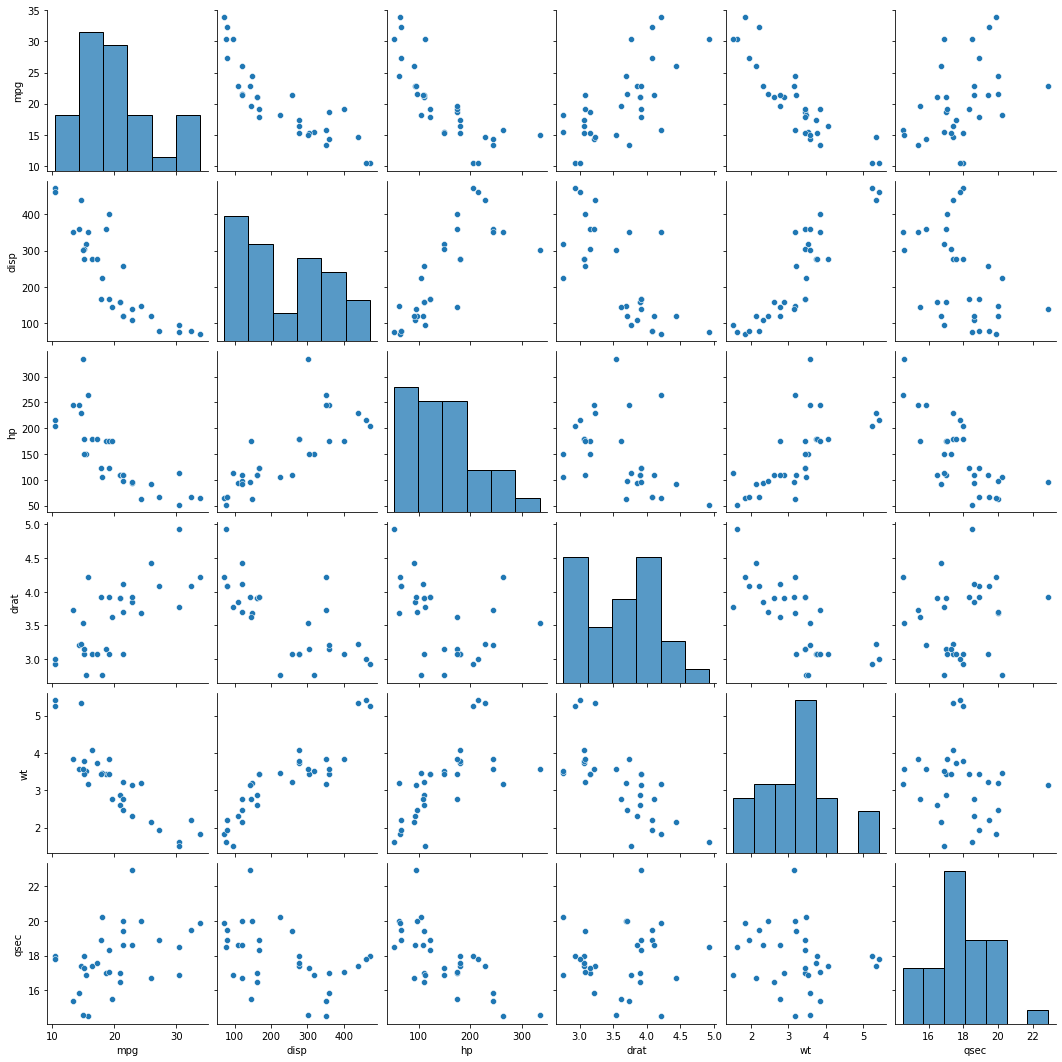

In [8]:
sns.pairplot(data=mtcars.drop(["cyl", "vs", "am", "gear", "carb"], axis=1));

## Correlation

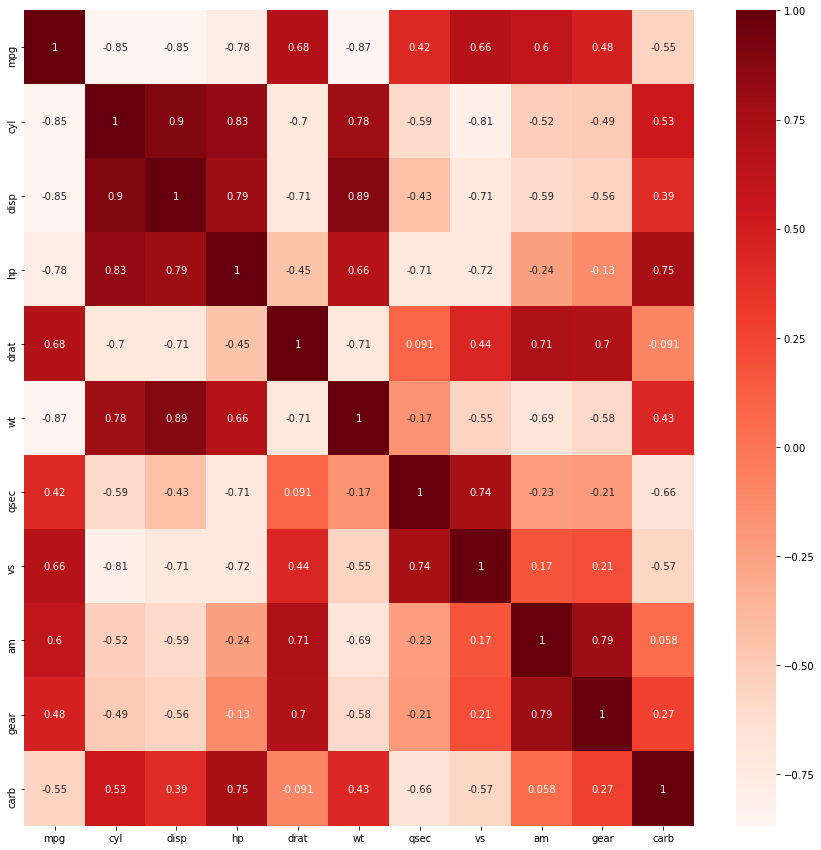

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(mtcars.corr(), cmap=plt.cm.Reds, annot=True);

In [10]:
mtcars.corr().unstack().sort_values(ascending=False).drop_duplicates().head(10)

mpg   mpg     1.000000
disp  cyl     0.902033
      wt      0.887980
cyl   hp      0.832447
gear  am      0.794059
hp    disp    0.790949
wt    cyl     0.782496
carb  hp      0.749812
qsec  vs      0.744535
am    drat    0.712711
dtype: float64

# Preprocessing

## Outlier

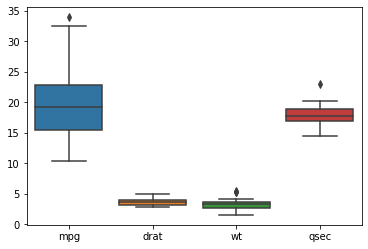

In [11]:
sns.boxplot(data=mtcars[["mpg", "drat", "wt", "qsec"]]);

In [12]:
mtcars.shape

(32, 11)

## Handle Outliers

In [13]:
mtcars = mtcars[(np.abs(stats.zscore(mtcars)) < 3).all(axis=1)]
mtcars.shape
# mtcars[(np.abs(stats.zscore(mtcars.mpg)) < 3)].shape

(31, 11)

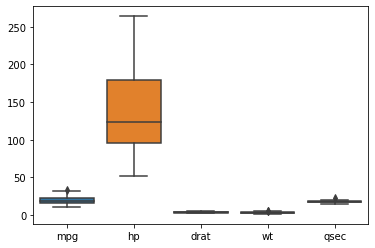

In [14]:
sns.boxplot(data=mtcars[["mpg", "hp", "drat", "wt", "qsec"]]);

# Modelling Multiple Linear Regression

In [15]:
from sklearn.linear_model import ElasticNet, LinearRegression

## Using ElasticNet Selection

In [16]:
X = mtcars.drop(["mpg"], axis=1)
Y = mtcars.mpg
reg = ElasticNet()
reg.fit(X, Y)
print("Best alpha using built-in ElasticNet: %f" % reg.alpha)
print("Best score using built-in ElasticNet: %f" % reg.score(X, Y))
coef_elastic = pd.Series(reg.coef_, index=X.columns)

Best alpha using built-in ElasticNet: 1.000000
Best score using built-in ElasticNet: 0.776411


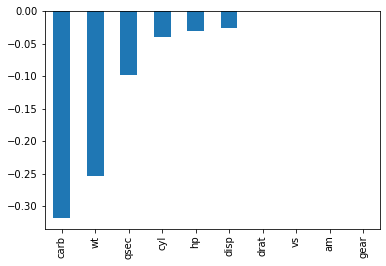

In [17]:
coeff = coef_elastic.sort_values()
coeff.plot(kind="bar")
plt.show()

**The best variable is carb, wt, qsec, cyl, hp, disp**

In [18]:
X2 = mtcars[["carb", "wt", "qsec", "cyl", "hp", "disp"]]
Y2 = mtcars.mpg
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2)

lin = LinearRegression()
lin.fit(x_train, y_train)
print("R2 for train:", lin.score(x_train, y_train))
print("R2 for test:", lin.score(x_test, y_test))
print("Coefficients: \n", lin.coef_, "    ", lin.intercept_)

R2 for train: 0.852503589421737
R2 for test: 0.7902998964972774
Coefficients: 
 [ 0.62133233 -4.28550304  0.49374967 -0.84297496 -0.04405826  0.02254225]      29.627259005453766


The multiple linear regression model produced is

$mpg = 0.138carb - 3.934wt - 0.080qsec - 1.277cyl - 0.0366hp + 0.019disp + 42.286$

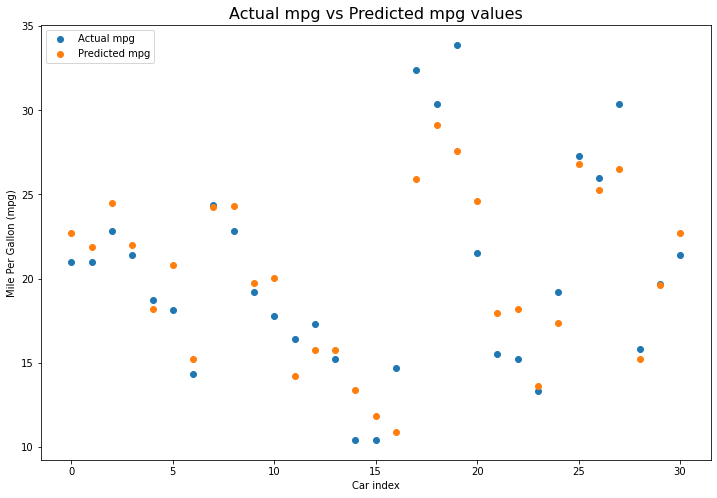

In [19]:
mtcars_new = mtcars.drop("mpg", axis=1)

# make a DataFrame of the actual mpg and the predicted mpg
data = pd.DataFrame(
    {
        "Actual mpg": mtcars.mpg.values,
        "Predicted mpg": lin.predict(
            mtcars[["carb", "wt", "qsec", "cyl", "hp", "disp"]].values
        ),
    }
)

plt.figure(figsize=(12, 8))
plt.scatter(data.index, data["Actual mpg"].values, label="Actual mpg")
plt.scatter(data.index, data["Predicted mpg"].values, label="Predicted mpg")
plt.title(
    "Actual mpg vs Predicted mpg values",
    fontsize=16,
)
plt.xlabel("Car index")
plt.ylabel("Mile Per Gallon (mpg)")
plt.legend(loc="upper left")
plt.show()

## Conclution
<!-- https://medium.com/@powusu381/multiple-regression-in-python-using-scikit-learn-predicting-the-miles-per-gallon-mpg-of-cars-4c8e512234be -->
<!-- https://www.kaggle.com/vigneshprakash/mt-cars-linear-regression -->
<!-- https://www.kaggle.com/ajinkyaa/mtcars-feature-selection-and-transformations#Feature-Selection -->

From the scatter plot, we can able to see that our model created good predictions because the values of the actual mpg and also the expected mpg are terribly near to one another.

We will say that we've got succeeded in training a model that predicts the Mileage Per Gallon (mpg) of a cars with the variable carb, wt, qsec, cyl, hp, disp.

R2 for train: 0.8491084328907186

R2 for test: 0.8380068023538729